In [ ]:
# Write at least 3 observationw or inferences that can be made from the data:

1. There are nearly an equal amount of male and female mice in use for the drug regimin tests, per the pie chart results. 
Therfore, gender does not appear to have an impact on the drup regimens of the mice.
2. The bar chart shows that Capomulin and Ramicane had the highest number of measurements taken by the test mice.
3. The box plot indicates that Capomulin and Ramicane had the lowest amount of tumor volumee from the test measurements.
4. There appears to be a positive and direct relationship between avg. tumor volume / mouse weight when using the Capomulin drug regimen per the linear regression results.

## Observations and Insights 

In [61]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

merge_df = pd.merge(study_results, mouse_metadata, how='left',on = "Mouse ID")

# Display the data table for preview
merge_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [62]:
# Checking the number of mice.

len(merge_df["Mouse ID"].unique())


249

In [63]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = merge_df.loc[merge_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
dup_mice

array(['g989'], dtype=object)

In [64]:
# Optional: Get all the data for the duplicate mouse ID. 



In [65]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df = merge_df[merge_df["Mouse ID"].isin(dup_mice)==False]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [66]:
# Checking the number of mice in the clean DataFrame.
len(clean_df["Mouse ID"].unique())

248

## Summary Statistics

In [67]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
import numpy as np

stats = pd.DataFrame([
merge_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"].rename("Mean"),
merge_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"].rename("Median"),
merge_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"].rename("Variance"),
merge_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"].rename("Standard Deviation"),
merge_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"].rename("SEM")
])
np.transpose(stats)

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [68]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_df = merge_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":['mean', 'median', 'var', 'std', 'sem']})
summary_df


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

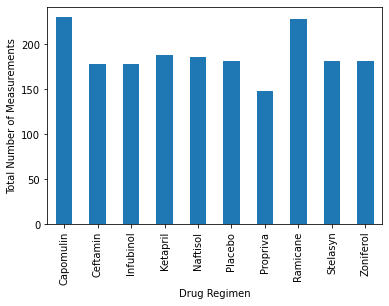

In [69]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

clean_df.groupby("Drug Regimen").count()["Mouse ID"].plot.bar()
plt.ylabel("Total Number of Measurements")
plt.show()

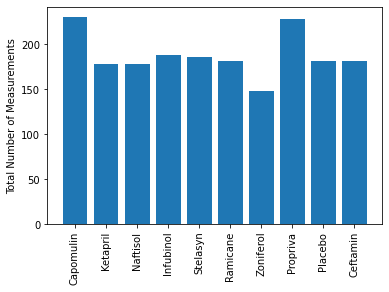

In [70]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
plt.bar(clean_df["Drug Regimen"].unique(),clean_df.groupby("Drug Regimen").count()["Mouse ID"])
plt.xticks(rotation=90)
plt.ylabel("Total Number of Measurements")
plt.show()

<AxesSubplot:ylabel='Sex'>

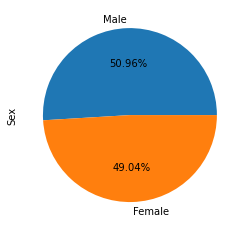

In [71]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender = clean_df["Sex"].value_counts()
gender.plot(kind='pie', autopct='%1.2f%%')

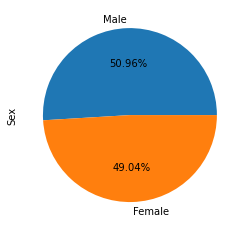

In [72]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(gender.values, labels=gender.index.values, autopct='%1.2f%%')
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [73]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_df = clean_df.groupby("Mouse ID").max()["Timepoint"]
max_df = max_df.reset_index()
#max_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
vol_merge_df = max_df.merge(clean_df,how='left', on =["Mouse ID", "Timepoint"])
vol_merge_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [74]:
#!pip install --upgrade numpy

# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes_df = vol_merge_df.loc[vol_merge_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"] 
    #tumor_volumes_df
    
    # add subset 
    tumor_vol.append(tumor_volumes_df)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volumes_df.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
#     print(f"The lower quartile of temperatures is: {lowerq}")
#     print(f"The upper quartile of temperatures is: {upperq}")
#     print(f"The interquartile range of temperatures is: {iqr}")
#     print(f"The the median of temperatures is: {quartiles[0.5]}")
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
#     print(f"Values below {lower_bound} could be outliers.")
#     print(f"Values above {upper_bound} could be outliers.")
    
    
    outliers_df = tumor_volumes_df.loc[(tumor_volumes_df < lower_bound) | (tumor_volumes_df > upper_bound)]
    print(f"{drug}: {outliers_df}")

Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


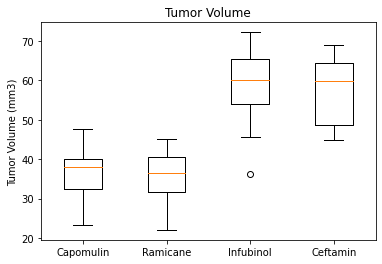

In [75]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol,labels = treatments)
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume')
plt.show()

## Line and Scatter Plots

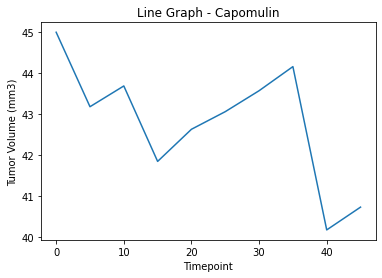

In [76]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

filter_df = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
# filter_df

mouse2_df = filter_df.loc[filter_df['Mouse ID'] == 's710']
mouse2_df

plt.plot(mouse2_df['Timepoint'], mouse2_df['Tumor Volume (mm3)'])         
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint')
plt.title('Line Graph - Capomulin')
plt.show()


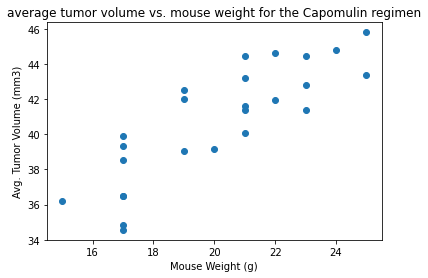

In [77]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

avg_filter_df = filter_df.groupby('Mouse ID').mean()
# avg_filter_df

plt.scatter(avg_filter_df['Weight (g)'], avg_filter_df['Tumor Volume (mm3)'])
plt.title("average tumor volume vs. mouse weight for the Capomulin regimen")
plt.ylabel('Avg. Tumor Volume (mm3)')
plt.xlabel('Mouse Weight (g)')
plt.show()

## Correlation and Regression

In [78]:
# Calculate the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(filter_df['Weight (g)'], filter_df['Tumor Volume (mm3)'])
print(f"The correlation between both factors is {round(correlation[0],2)}")


The correlation between both factors is 0.53


The r-squared is: 0.7088568047708721


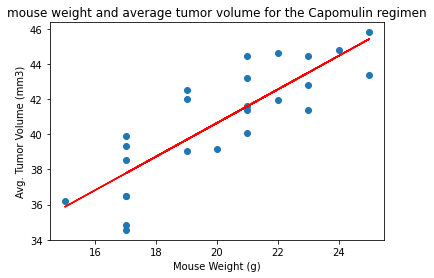

In [79]:
# Calculate the linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


x_values = avg_filter_df['Weight (g)']
y_values = avg_filter_df['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.title('mouse weight and average tumor volume for the Capomulin regimen')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Avg. Tumor Volume (mm3)')
print(f"The r-squared is: {rvalue**2}")
plt.show()